In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
cats = pd.read_csv('..//data/cats.csv')
barnyard = pd.read_csv('..//data/barnyard.csv')
dogs = pd.read_csv('..//data/dogs.csv')
horses = pd.read_csv('..//data/horses.csv')
rabbits = pd.read_csv('..//data/rabbits.csv')
scales = pd.read_csv('..//data/scales.csv')
smallandfurry = pd.read_csv('..//data/smallandfurry.csv')

In [3]:
animals = pd.concat([cats, barnyard, dogs, horses, rabbits, scales, smallandfurry])
animals.reset_index(drop=True, inplace=True)

In [4]:
animals.groupby('species')['id'].count()

species
Cat                14240
Dog                19893
Goat                   4
Guinea Pig            57
Hamster                2
Hedgehog               2
Horse                 12
Miniature Horse        3
Mule                   1
Pig                    5
Pot Bellied           18
Rabbit               108
Rat                    2
Reptile                1
Snake                  1
Name: id, dtype: int64

In [5]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34402 entries, 0 to 34401
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            34349 non-null  float64
 1   organization_id               34349 non-null  object 
 2   url                           34349 non-null  object 
 3   type                          34349 non-null  object 
 4   species                       34349 non-null  object 
 5   age                           34349 non-null  object 
 6   gender                        34349 non-null  object 
 7   size                          34349 non-null  object 
 8   coat                          13600 non-null  object 
 9   tags                          34349 non-null  object 
 10  name                          34349 non-null  object 
 11  description                   19640 non-null  object 
 12  organization_animal_id        19328 non-null  object 
 13  p

#### Top 20 Breeds (All Animals)

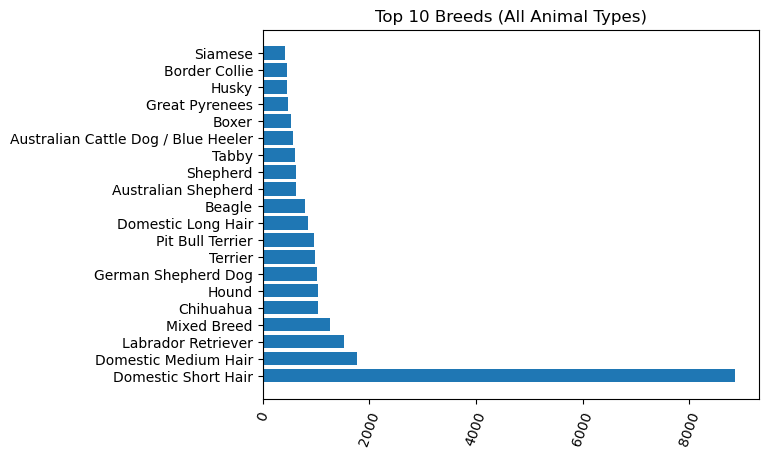

In [6]:
top_10_all = animals['breeds.primary'].value_counts().reset_index(name='count').sort_values('count', ascending=False).head(20)

plt.barh('breeds.primary', 'count', data =top_10_all)
plt.xticks(rotation = 70)
plt.title('Top 10 Breeds (All Animal Types)');

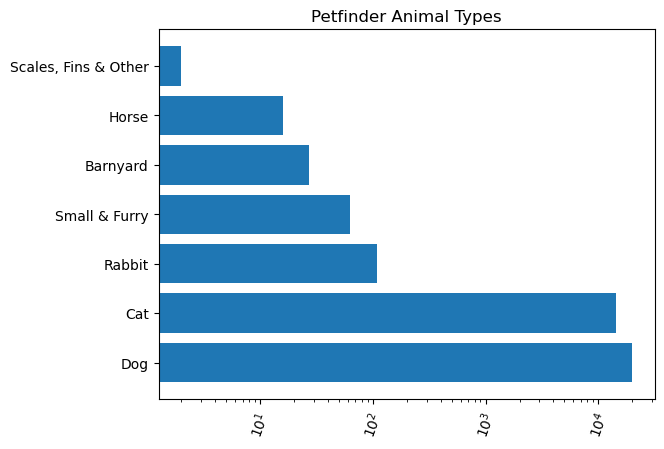

In [7]:
animal_types = animals['type'].value_counts().reset_index(name='count')
animal_types

plt.barh('type', 'count', data = animal_types)
plt.xticks(rotation = 70)
plt.xscale('log')
plt.title('Petfinder Animal Types');

In [8]:
pop_names = animals['name'].value_counts().reset_index(name='count').sort_values('count', ascending=False).head(50)

pop_names

,name,count
0,Daisy,74
1,Luna,65
2,Charlie,56
3,Bella,55
4,Buddy,51
5,Max,49
6,Rosie,47
7,Lucy,46
8,Sadie,46
9,Penny,42


In [9]:
animals['coat'].value_counts()

coat
Short       9567
Medium      2891
Long         878
Curly        160
Wire          98
Hairless       6
Name: count, dtype: int64

In [10]:
animals['colors.primary'].value_counts()

colors.primary
Black                               3392
White / Cream                       1269
Tricolor (Brown, Black, & White)     884
Brown / Chocolate                    839
Gray / Blue / Silver                 826
Yellow / Tan / Blond / Fawn          703
Black & White / Tuxedo               630
Tabby (Brown / Chocolate)            624
Tabby (Gray / Blue / Silver)         566
Apricot / Beige                      530
Brindle                              503
Red / Chestnut / Orange              461
Bicolor                              441
Tabby (Orange / Red)                 313
Gray & White                         310
Orange & White                       272
Golden                               259
Calico                               251
White                                246
Tortoiseshell                        242
Orange / Red                         231
Tabby (Buff / Tan / Fawn)            177
Merle (Blue)                         125
Buff / Tan / Fawn                    124
T

In [11]:
animals['breeds.unknown'].value_counts()

breeds.unknown
False    34349
Name: count, dtype: int64

In [12]:
animals['age'].value_counts()

age
Adult     16719
Baby       8567
Young      7546
Senior     1517
Name: count, dtype: int64

In [13]:
print('unique primary breeds:', animals['breeds.primary'].nunique())
print('unique secondary breeds:', animals['breeds.secondary'].nunique())
print('unique primary color:', animals['colors.primary'].nunique())
print('unique secondary color:', animals['colors.secondary'].nunique())
print('unique tertiary color:', animals['colors.tertiary'].nunique())

unique primary breeds: 298
unique secondary breeds: 217
unique primary color: 57
unique secondary color: 55
unique tertiary color: 47


In [14]:
adopted = animals[animals['status'] ==  'adopted']
adoptable = animals[animals['status'] == 'adoptable']

print('all animal files:', animals.shape)
print('all adopted animals as of 2/6:', adopted.shape)
print('all available animals as of 2/6', adoptable.shape)

all animal files: (34402, 63)
all adopted animals as of 2/6: (31220, 63)
all available animals as of 2/6 (3129, 63)


In [15]:
animals.isna().sum().reset_index(name='count na').sort_values('count na', ascending=False)

,index,count na
62,id.1,34402
55,Unnamed: 55,34402
49,primary_photo_cropped,34402
50,Unnamed: 50,34402
51,Unnamed: 51,34402
...,...,...
26,attributes.spayed_neutered,53
17,published_at,53
18,distance,53
22,breeds.unknown,53


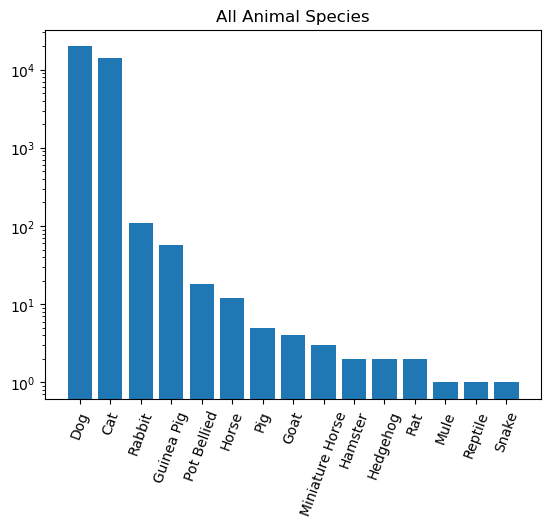

In [16]:
animal_types = animals.groupby('species')['species'].count().reset_index(name='count').sort_values('count', ascending=False)
plt.bar('species', 'count', data = animal_types)
plt.xticks(rotation = 70)
plt.yscale('log')  
plt.title('All Animal Species');

In [17]:
animals.groupby('status')['status'].count()

status
adoptable     3129
adopted      31220
Name: status, dtype: int64

In [18]:
breeds_count = animals.groupby('breeds.primary')['id'].count().reset_index(name='count')
breeds_count = breeds_count.sort_values('count', ascending=False).head(10)
breeds_count

,breeds.primary,count
96,Domestic Short Hair,8863
95,Domestic Medium Hair,1763
160,Labrador Retriever,1516
181,Mixed Breed,1257
74,Chihuahua,1044
147,Hound,1037
124,German Shepherd Dog,1014
272,Terrier,982
212,Pit Bull Terrier,968
94,Domestic Long Hair,850


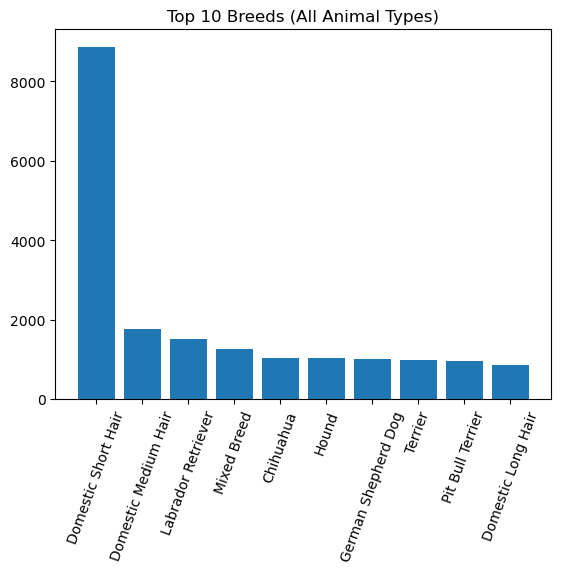

In [19]:
plt.bar('breeds.primary', 'count', data = breeds_count)
plt.xticks(rotation = 70)
plt.title('Top 10 Breeds (All Animal Types)');

In [20]:
cat_breeds = animals[animals['species']=='Cat']
cat_breeds.shape

(14240, 63)

In [21]:
cat_breeds_count = cat_breeds.groupby('breeds.primary')['id'].count().reset_index(name='count').sort_values('count', ascending=False).head(10)

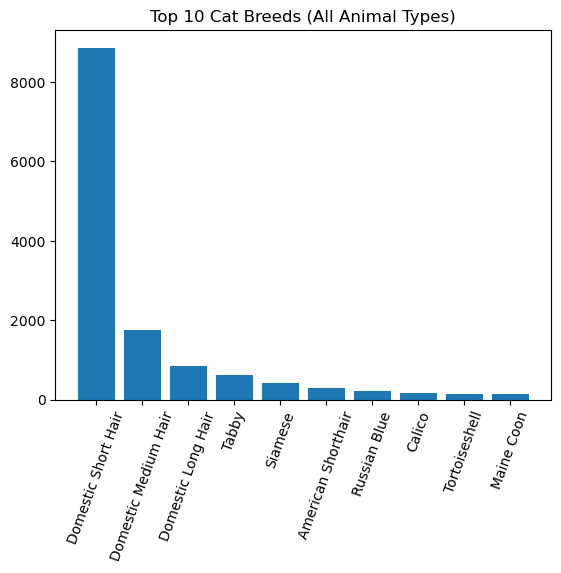

In [22]:
plt.bar('breeds.primary', 'count', data = cat_breeds_count)
plt.xticks(rotation = 70)
plt.title('Top 10 Cat Breeds (All Animal Types)');

In [23]:
adopted = animals[animals['status'] == 'adopted']
print(adopted.shape)
adopted.head()

(31220, 63)


,id,organization_id,url,type,species,age,gender,size,coat,tags,name,description,organization_animal_id,photos,videos,status,status_changed_at,published_at,distance,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,colors.primary,colors.secondary,colors.tertiary,attributes.spayed_neutered,attributes.house_trained,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,primary_photo_cropped.small,primary_photo_cropped.medium,primary_photo_cropped.large,primary_photo_cropped.full,contact.email,contact.phone,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,_links.self.href,_links.type.href,_links.organization.href,primary_photo_cropped,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,id.1
0,70208019.0,TN801,https://www.petfinder.com/cat/madame-kitty-702...,Cat,Cat,Young,Female,Medium,Short,[],Madame Kitty,"Meet Madame Kitty, a 2 year old DSH cat. She i...",NaN,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,[],adopted,2024-01-22T13:31:21+0000,2023-12-31T23:19:08+0000,120.4729,Domestic Short Hair,NaN,False,False,Calico,NaN,NaN,True,True,0.0,False,True,True,NaN,NaN,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,meowmeowkittyrescue@yahoo.com,NaN,"2288 Gunbarrel Rd #172, Chattanooga, TN 37421",NaN,Chattanooga,TN,37421.0,US,/v2/animals/70208019,/v2/types/cat,/v2/organizations/tn801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70207823.0,TN597,https://www.petfinder.com/cat/truffles-7020782...,Cat,Cat,Baby,Female,Small,Short,"['Friendly', 'Affectionate', 'Playful']",Truffles,Truffles is the new kid on the block. This pr...,NaN,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,[],adopted,2024-01-18T00:05:29+0000,2023-12-31T22:40:37+0000,33.2060,Dilute Calico,NaN,True,False,Dilute Calico,Brown / Chocolate,NaN,True,True,0.0,False,True,True,True,True,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,NaN,(931) 623-1266,1163 Blake Road,NaN,Lyles,TN,37098.0,US,/v2/animals/70207823,/v2/types/cat,/v2/organizations/tn597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70207450.0,TN369,https://www.petfinder.com/cat/teetee-70207450/...,Cat,Cat,Baby,Male,Small,Short,"['Friendly', 'Affectionate', 'Playful']",TeeTee,Meet TeeTee! He is an extremely adorable and s...,1207-23,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,[],adopted,2024-01-06T00:56:45+0000,2023-12-31T21:45:47+0000,7.6471,Domestic Short Hair,NaN,False,False,Tabby (Gray / Blue / Silver),NaN,NaN,True,True,0.0,False,True,NaN,True,True,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,fosterkittenstn@gmail.com,NaN,P.O. Box 140898,NaN,Nashville,TN,37214.0,US,/v2/animals/70207450,/v2/types/cat,/v2/organizations/tn369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70203376.0,TN90,https://www.petfinder.com/cat/ac-25055-7020337...,Cat,Cat,Young,Male,Medium,NaN,[],AC 25055,NaN,A2023C688,[],[],adopted,2023-12-31T10:03:59+0000,2023-12-31T10:03:58+0000,223.6873,Domestic Short Hair,NaN,False,False,NaN,NaN,NaN,False,False,0.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(423) 639-4771,400 N Rufe Taylor Rd,NaN,Greeneville,TN,37745.0,US,/v2/animals/70203376,/v2/types/cat,/v2/organizations/tn90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70203375.0,TN90,https://www.petfinder.com/cat/ac-25035-7020337...,Cat,Cat,Young,Female,Medium,NaN,[],AC 25035,NaN